In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd
from shapely.geometry import Point
from tueplots import bundles
import requests
plt.rcParams.update(bundles.icml2022())

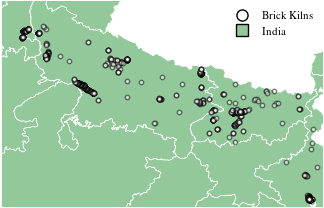

In [2]:
# Loading the Indian GeoJSON map data from a repository on GitHub
geojson_url = "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson"
response = requests.get(geojson_url)
geojson_data = response.json()

# Create a GeoDataFrame for India from the GeoJSON data
gdf_india = gpd.GeoDataFrame.from_features(geojson_data['features'])


#Loading the brick kiln coordinates
data1 = pd.read_csv('brick_kilns1.csv')
data2 = pd.read_csv('brick_kilns2.csv')

# Create a list of the coordinates of the brick kilns
geometry = [Point(lon, lat) for lat, lon in zip(data1['latitude'], data1['longitude'])]
geometry2 = [Point(lon, lat) for lat, lon in zip(data2['latitude'], data2['longitude'])]

# Create a GeoDataFrame from the points
points_gdf1 = gpd.GeoDataFrame(data1, geometry=geometry)
points_gdf2 = gpd.GeoDataFrame(data2, geometry=geometry2)


fig, ax = plt.subplots(figsize=(3.3, 3.3))


# Plot the GeoJSON map with a custom color for the country boundary
gdf_india.plot(ax=ax, color=(147/255, 200/255, 155/255), edgecolor='white', linewidth=0.5, label='India')

# Define a custom marker style
beautiful_marker = 'o'


points_gdf1.plot(ax=ax, color='white', marker=beautiful_marker, markersize=10, alpha=0.5, label='Brick Kilns', edgecolor='black')
points_gdf2.plot(ax=ax, color='white', marker=beautiful_marker, markersize=10, alpha=0.5, label='Brick Kilns', edgecolor='black')

dummy_legend = [

    plt.Line2D([0], [0], marker='o', color='w', label='Brick Kilns', markerfacecolor='white', markersize=8, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='s', color='w', label='India', markerfacecolor=(147/255, 200/255, 155/255), markersize=8, markeredgecolor='black')

]

# Add the legend
ax.legend(handles=dummy_legend, loc='upper right', fontsize=8, frameon = False)


# Set the desired range of longitude values for x-axis display
desired_y_ticks = [22,23,24,25,26,27,28,29,30]
ax.set_ylim(min(desired_y_ticks), max(desired_y_ticks))

desired_x_ticks = [ 76,77,78,79,80,81,82,83,84,85,86,87,88,88.5]
ax.set_xlim(min(desired_x_ticks), max(desired_x_ticks))

# Set x-axis ticks to only show the desired values
ax.set_xticks(desired_x_ticks)
ax.set_yticks(desired_y_ticks)
# # Remove x and y axis
# ax.set_xticks([])
# ax.set_yticks([])
sns.despine()
ax.axis('off')
# Save the plot as a PDF file
plt.savefig("figure5.pdf", format="pdf")


# Show the plot
plt.show()

